In [243]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from ipywidgets import widgets
import plotly.graph_objs as go
import plotly.offline as offline

## LIMPIEZA Y CREACION DF EMISIONES CARNICOS + AGRICULTURA

In [124]:
df_original=pd.read_csv("Data\EU_total_emissions.csv")
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18478 entries, 0 to 18477
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATAFLOW     18478 non-null  object 
 1   LAST UPDATE  18478 non-null  object 
 2   freq         18478 non-null  object 
 3   unit         18478 non-null  object 
 4   airpol       18478 non-null  object 
 5   src_crf      18478 non-null  object 
 6   geo          18478 non-null  object 
 7   TIME_PERIOD  18478 non-null  int64  
 8   OBS_VALUE    15088 non-null  float64
 9   OBS_FLAG     3390 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [125]:
#Eliminamos columnas con datos no relevantes
df_original.drop(columns=["OBS_FLAG", "DATAFLOW","LAST UPDATE", "freq","unit", "airpol"], inplace=True)

In [126]:
df_original.rename(columns={"geo": "Pais", "TIME_PERIOD": "Año"}, inplace=True)

### filtramos para quedarnos solo con los datos de emisiones agricultura y carnicos

In [122]:
carnic_emisiones = df_original[df_original["src_crf"] == 'Livestock'].copy()  #solo carnicos
carnic_emisiones= carnic_emisiones.reset_index(drop=True)   #limpiamos index
carnic_emisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   src_crf    620 non-null    object 
 1   Pais       620 non-null    object 
 2   Año        620 non-null    int64  
 3   OBS_VALUE  620 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [128]:
carnic_emisiones.rename(columns={"OBS_VALUE":"Emisiones Carnicos"}, inplace=True)

In [129]:
carnic_emisiones.drop(columns=["src_crf"], inplace = True)

### Agricultura

In [43]:
agri_emisiones = df_original[df_original["src_crf"] == 'Agriculture'].copy() #solo agricultura
agri_emisiones.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 0 to 9548
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   src_crf    620 non-null    object 
 1   Pais       620 non-null    object 
 2   Año        620 non-null    int64  
 3   OBS_VALUE  620 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 24.2+ KB


In [44]:
agri_emisiones.rename(columns={"OBS_VALUE":"Emisiones Agricultura", "geo": "Pais", "TIME_PERIOD": "Año"}, inplace=True)


In [45]:
agri_emisiones.drop(columns=["src_crf"], inplace=True)


In [46]:
nueva = carnic_emisiones[["Emisiones Carnicos"] ].copy()
nueva= nueva.reset_index()
nueva.drop(columns=["index"], inplace=True)
nueva     #aislamos emisiones carnicas para unirla a agricultura

,Emisiones Carnicos
0,5.31348
1,5.34052
2,5.37856
3,5.39946
4,5.42585
...,...
615,1377.36000
616,1380.79000
617,1341.08000
618,1313.41000


In [24]:
agri_car_emision = pd.concat([agri_emisiones, nueva], axis=1) #declaramos variable con carnicos+atgricul



In [159]:
#Uno de los data frames hacia duplicado de valores, al juntarlos ese duplicado presetna un Nan en 
#emisiones agr x lo que elimino los duplicados 
agri_car_emision.dropna(inplace=True)

In [160]:
agri_car_emision

,Pais,Año,Emisiones Agricultura,Emisiones Carnicos
0,Austria,2012.0,7.21242,5.31348
1,Austria,2013.0,7.21117,5.34052
2,Austria,2014.0,7.34622,5.37856
3,Austria,2015.0,7.37600,5.39946
4,Austria,2016.0,7.48882,5.42585
...,...,...,...,...
305,Slovakia,2017.0,2.49206,1.37736
306,Slovakia,2018.0,2.51248,1.38079
307,Slovakia,2019.0,2.52901,1.34108
308,Slovakia,2020.0,2.53175,1.31341


## DATA TOP PAISES

In [165]:
#Me quedo solo con los paises top en pob bovina
agri_car_emision_top= agri_car_emision[agri_car_emision["Pais"].isin(["France", "Spain", "Germany", "Ireland", "Italy", "Poland"])]

In [166]:
agri_car_emision_top= agri_car_emision_top.reset_index(drop=True)

## CREACION GRAFICOS

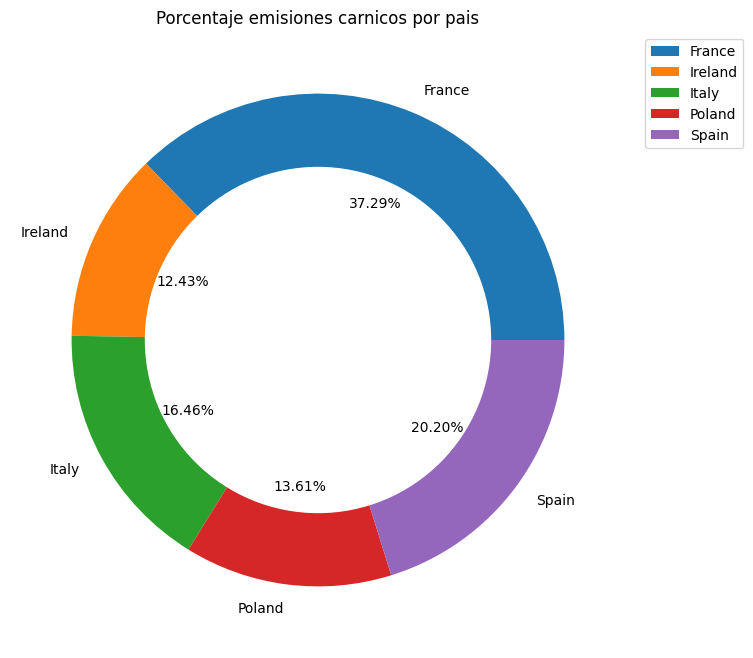

In [171]:
import matplotlib.pyplot as plt
objeto = agri_car_emision_top
columna = "Emisiones Carnicos"
nombre_archivo = "Emisiones_pais%_carne"
titulo = "Porcentaje emisiones carnicos por pais"
# create data

data = (objeto.groupby('Pais')[columna].sum() / agri_car_emision[columna].sum()) * 100

 
# # Create a circle for the center of the plot
my_circle=plt.Circle( (0,0),
                     0.7, # Grosor del donut
                     color='white')

fig2 = plt.figure(figsize=(8,8))

plt.pie(data.values,
        labels=data.index,
        autopct='%1.2f%%');

p=plt.gcf()
p.gca().add_artist(my_circle);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.title(titulo)
fig2.savefig('Graficos/{}.png'.format(nombre_archivo), bbox_inches='tight')

In [151]:
#scaterplot correlacion agricultura y carnicos
objeto = agri_car_emision_top
columna_x = "Emisiones Agricultura"
columna_y = "Emisiones Carnicos"
nombre_archivo = "scatterplot_agri_carn_por_pais"
titulo = "Correlación por paises"
x = objeto[columna_x]
y = objeto[columna_y]


correlacion1= plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, hue='Año')

# Ajustar los títulos de los ejes
plt.xlabel(" '" + columna_x + "'")
plt.ylabel(" '" + columna_y + "'")

# Mostrar el gráfico
plt.show()
#correlacion1.savefig('Graficos/{}.png'.format(nombre_archivo), bbox_inches='tight')


ValueError: Could not interpret value `Año` for parameter `hue`

<Figure size 800x600 with 0 Axes>

In [215]:
#importamos pob bovina
pob_bovina=pd.read_csv("Data\pob_bovina_top5.csv")
pob_bovina.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   AÑO                                               10 non-null     int64  
 1   France                                            10 non-null     float64
 2   Germany (until 1990 former territory of the FRG)  10 non-null     float64
 3   Ireland                                           10 non-null     float64
 4   Italy                                             10 non-null     float64
 5   Poland                                            10 non-null     float64
 6   Spain                                             10 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 688.0 bytes


In [217]:
pob_bovina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   AÑO                                               10 non-null     int64  
 1   France                                            10 non-null     float64
 2   Germany (until 1990 former territory of the FRG)  10 non-null     float64
 3   Ireland                                           10 non-null     float64
 4   Italy                                             10 non-null     float64
 5   Poland                                            10 non-null     float64
 6   Spain                                             10 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 688.0 bytes


In [225]:
df_bovina = pob_bovina.melt(id_vars='AÑO', var_name='Pais', value_name='Pob.bovina')
df_bovina.rename(columns={"AÑO":"Año"}, inplace=True)

In [226]:
df_bovina.head()

,Año,Pais,Pob.bovina
0,2013,France,33440.88
1,2014,France,33755.95
2,2015,France,34081.02
3,2016,France,33997.01
4,2017,France,32876.64


In [227]:
df_merged = pd.merge(agri_car_emision_top, df_bovina, on=['Pais', 'Año'])

In [232]:
df_merged.head()

,Pais,Año,Emisiones Agricultura,Emisiones Carnicos,Pob.bovina
0,Spain,2013.0,31.33811,24.49500,10672.86
1,Spain,2014.0,32.62116,25.19307,11428.54
2,Spain,2015.0,33.23625,25.93048,11618.57
3,Spain,2016.0,33.30531,26.18989,11928.79
4,Spain,2017.0,34.08483,26.63711,12272.08


In [245]:
df_merged.to_csv("Data\df_merged.csv")


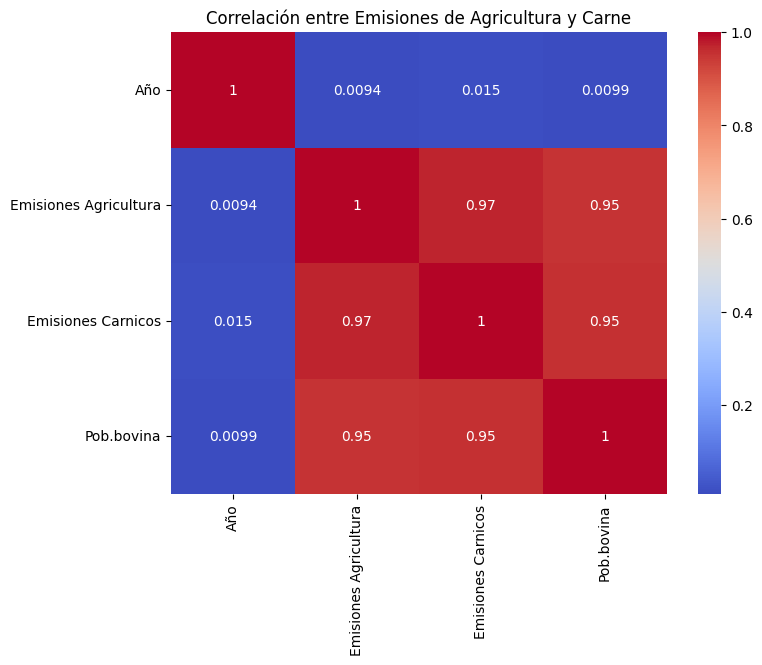

In [250]:
# Calcular la matriz de correlación
correlation_matrix = df_merged.corr()

# Crear el heatmap utilizando seaborn
figcorre = plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlación entre Emisiones de Agricultura y Carne')

figcorre.savefig('Graficos/correlacion_care_agr_bovina.jpg', bbox_inches='tight')

In [244]:
# Crear una lista con los nombres de los países
paises = ['France', 'Ireland', 'Italy', 'Poland', 'Spain']
df= df_merged



# Filtrar el dataframe original por los países seleccionados
df_filtered = df_merged[df_merged['Pais'].isin(paises)]

# Inicializar la figura
fig = go.Figure()

# Iterar sobre cada país
for pais in paises:
    # Filtrar los datos del país
    data_pais = df_filtered[df_filtered['Pais'] == pais]
    
    # Multiplicar las emisiones cárnicas por 1000 para convertirlas a millones de toneladas
    emisiones_carnicas_millones = data_pais['Emisiones Carnicos'] * 1000
    
    # Agregar una línea para las emisiones cárnicas del país
    fig.add_trace(go.Scatter(
        x=data_pais['Año'],
        y=emisiones_carnicas_millones,
        name=f'Emisiones Cárnicas - {pais}',
        mode='lines',
        visible='legendonly'  # Las trazas no están visibles por defecto
    ))
    
    # Población bovina del país
    fig.add_trace(go.Scatter(
        x=data_pais['Año'],
        y=data_pais['Pob.bovina'],
        name=f'Población Bovina - {pais}',
        mode='lines',
        visible='legendonly'  # No se ven por defecto
    ))

# Diseño del grafico
fig.update_layout(
    title='Emisiones Cárnicas y Población Bovina por País',
    xaxis_title='Año',
    yaxis_title='Valor (millones de toneladas / miles de cabezas)',
    legend=dict(
        orientation='v',
        x=1.1,
        y=0.5,
        yanchor='middle',
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='rgba(0, 0, 0, 0.5)',
        borderwidth=1
    )
)

# Mostrar la leyenda y habilitar el selector de países
fig.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=[
                dict(label='Todos los países',
                     method='update',
                     args=[{'visible': [True] * (len(paises) * 2)},
                           {'title': 'Emisiones Cárnicas y Población Bovina por País'}]),
                *[
                    dict(label=pais,
                         method='update',
                         args=[{'visible': [False] * (i * 2) + [True, True] + [False] * ((len(paises) - i - 1) * 2)},
                               {'title': f'Emisiones Cárnicas y Población Bovina - {pais}'}])
                    for i, pais in enumerate(paises)
                ]
            ]
        )
    ]
)

fig.show()
offline.plot(fig, filename='grafico.html', auto_open=False)

'grafico.html'

## CREAR CSV DE DATAFRAMES

In [73]:
#carnic_emisiones.to_csv("Data\emisiones_carne.csv")

#agri_emisiones.to_csv("Data\emisiones_agricultura.csv")

#agri_car_emision.to_csv("Data\Total_agri_car_emision.csv")

## PIVOT data

In [15]:
df_previo = pd.pivot_table(agri_car_emision, index='Año', columns='Pais', aggfunc='sum')

In [16]:
df_previo

Emisiones Agricultura                                                 \
Pais                 Austria     Belgium    Bulgaria     Croatia     Cyprus   
Año                                                                           
2012.0            7219.63242  9589.06949  4989.98500  3064.47141  555.76521   
2013.0            7218.38117  9589.28971  5437.63220  2803.68088  513.52301   
2014.0            7353.56622  9717.90820  5857.90205  2738.91618  499.57908   
2015.0            7383.37600  9724.89518  5896.83094  2789.98720  506.45595   
2016.0            7496.30882  9611.31171  6204.28809  2747.77503  530.34982   
2017.0            7451.57413  9662.79314  6171.68552  2846.83399  545.21467   
2018.0            7337.53020  9542.62309  6030.93491  2733.47074  550.69014   
2019.0            7228.43121  9569.47992  6010.04404  2723.96124  566.02546   
2020.0            7204.65746  9525.61610  5984.16819  2703.42072  603.76316   
2021.0            7228.38116  9423.60419  6112.44634  2703.64094  626.82620   

                                             \
Pais       Czechia      Denmark     Estonia   
Año                                           
2012.0  7580.47290  12073.31125  1411.12972   
2013.0  7492.04456  12068.33628  1453.05160   
2014.0  7567.49994  12204.85266  1499.68819   
2015.0  8172.66450  12041.45943  1461.36991   
2016.0  8413.62522  12248.18595  1427.53611   
2017.0  8199.63144  12294.62234  1480.10863   
2018.0  7997.77979  12158.42628  1481.81033   
2019.0  7941.37344  12091.18911  1561.10955   
2020.0  7725.54783  12401.16878  1571.30974   
2021.0  7852.38454  12086.46439  1585.52394   

                                                              ...  \
Pais   European Union - 27 countries (from 2020)     Finland  ...   
Año                                                           ...   
2012.0                              375910.66513  6244.97874  ...   
2013.0                              378088.77106  6356.74039  ...   
2014.0                              383145.99323  6415.65925  ...   
2015.0                              384664.52024  6398.89250  ...   
2016.0                              386737.21086  6445.41898  ...   
2017.0                              388550.91275  6353.01667  ...   
2018.0                              385529.22408  6303.22693  ...   
2019.0                              380628.20796  6452.31587  ...   
2020.0                              382338.78683  6421.00459  ...   
2021.0                              378808.90047  6309.41311  ...   

       Emisiones Carnicos                                                 \
Pais          Netherlands   Norway    Poland Portugal   Romania Slovakia   
Año                                                                        
2012.0           13.49515  3.01639  16.98683  4.68302  10.51529  1.47083   
2013.0           13.79210  3.04937  17.03994  4.61438  10.62990  1.44747   
2014.0           13.91690  3.07223  17.17146  4.63104  10.86415  1.42800   
2015.0           14.42786  3.11828  17.36665  4.69322  10.91800  1.42448   
2016.0           14.87561  3.17917  17.09022  4.79516  10.85523  1.38399   
2017.0           14.73363  3.16617  17.67603  4.90849  10.61135  1.37736   
2018.0           14.22254  3.14848  17.99255  4.98678  10.50771  1.38079   
2019.0           14.07605  3.05831  18.07382  5.04600  10.41965  1.34108   
2020.0           13.99269  3.06387  18.47249  5.08921  10.50285  1.31341   
2021.0           13.72012  3.10852  18.55131  5.10349  10.16308  1.27313   

                                                
Pais   Slovenia     Spain   Sweden Switzerland  
Año                                             
2012.0  1.32732  25.23987  3.93793     4.81146  
2013.0  1.31574  24.49500  3.96888     4.76017  
2014.0  1.34320  25.19307  3.96300     4.79211  
2015.0  1.38559  25.93048  3.94959     4.77579  
2016.0  1.41011  26.18989  3.94045     4.74080  
2017.0  1.38517  26.63711  3.97582     4.69638  
2018.0  1.37896  26.65623  3.95996     

In [12]:
#divisimos en los dos data sets.
df_BAJA = df_previo[[ "Czechia", "Denmark","Finland", "Slovenia", "Slovakia", "Greece", "Hungary", "Bulgaria", "Croatia", "Cyprus", "Estonia", "Iceland", "Latvia", "Luxembourg", "Malta"]]

In [13]:
df_ALTA = df_previo[[ 'Austria', 'Belgium', 'France',
       'Germany (until 1990 former territory of the FRG)', 'Ireland', 'Italy',
       'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Spain',
       'Sweden', 'Switzerland']]

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

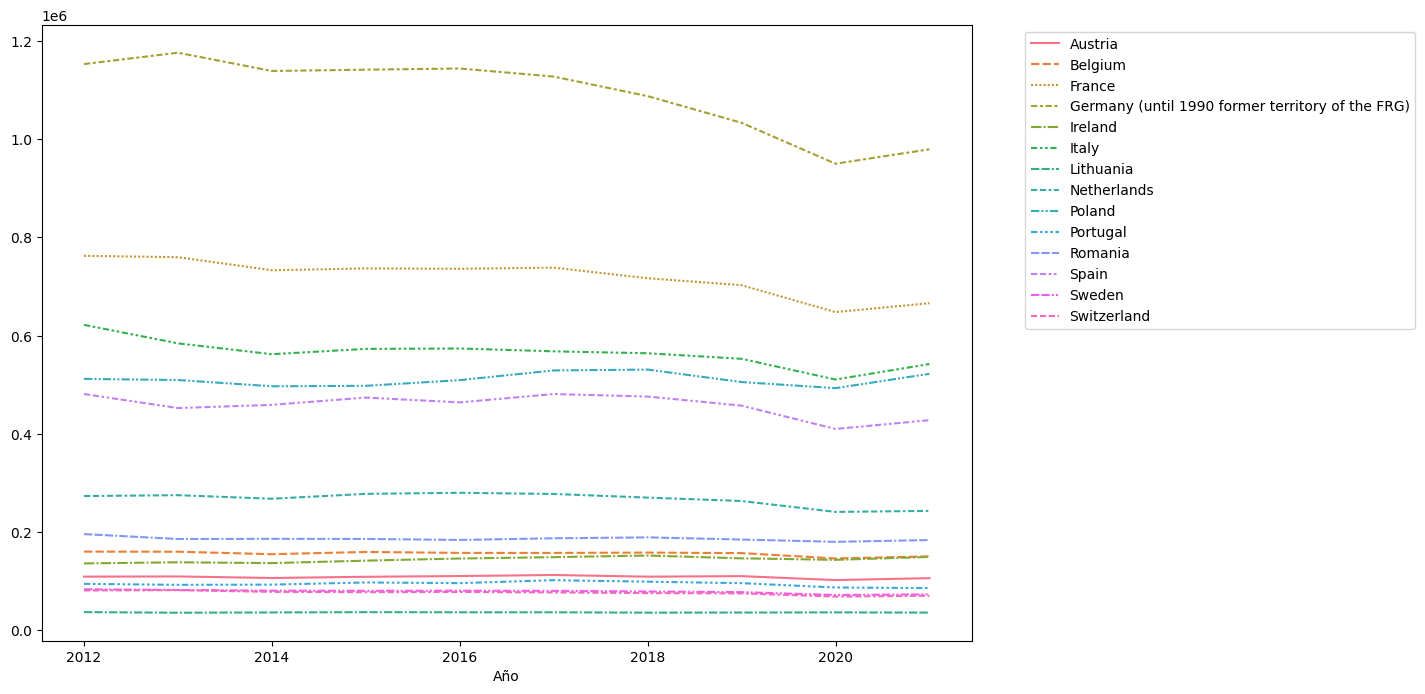

In [14]:
plt.figure(figsize=(12,8))
sns.lineplot(data = df_ALTA)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title